# Naive Bayes Classifier

### Eduardo Moreno Ortigosa

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder

In [87]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

## Problem 1. Naive Bayes Classifier on types of mushrooms dataset

#### Reading the mushrooms dataset

In [3]:
mush = pd.read_csv("agaricus-lepiota.data", 
                  names=['class','cap-shape','cap-surface','cap-color','bruises','odor',
                         'gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape',
                        'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
                        'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color',
                        'ring-number','ring-type','spore-print-color','population','habitat'])

In [4]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [5]:
mush.shape

(8124, 23)

In [6]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

#### Exploratory Data Analysis

#### 1. Cleaning the data

In [8]:
# Looking for missing values

# NULL values
print("There are",mush.isnull().any().sum(),"NULL values")

# Na values
print("There are",mush.isna().any().sum(),"Nan values")

There are 0 NULL values
There are 0 Nan values


In [9]:
# Looking for '?' character
mush[mush=='?'].sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### 2. Preparing the data

In order to perform the visualization and algorithm, it would be necessary to convert the data into integer.

In [10]:
lbl = LabelEncoder()

In [11]:
mush_encod = mush
for col in mush.columns:
    mush_encod[col]=lbl.fit_transform(mush[col])

In [12]:
mush_encod.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Since there is only 1 value in veil type column, it does not give any additional information and hence, it could be removed from data.

In [13]:
mush_encod['veil-type'].unique()

array([0])

In [14]:
mush_encod.drop('veil-type',axis=1,inplace=True)

In [15]:
mush_encod.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### 3. Visualizing the data

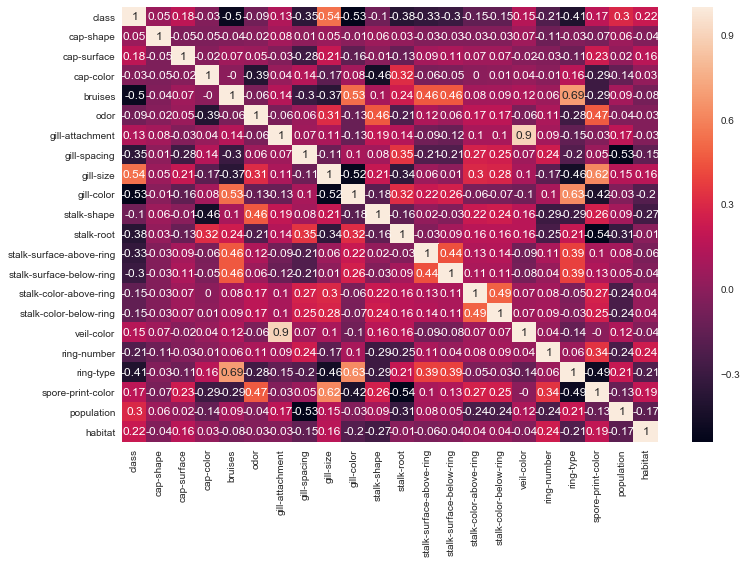

In [16]:
# Setting the size of the following figures
sns.set(rc={'figure.figsize':(12,8)})

# Now exploring the correlations of each feature and the target
sns.heatmap(mush_encod.corr().round(2), annot=True)

In [28]:
# Correlation (positive or negative) greater than 0.5
mush_encod.corr()[(mush_encod.corr()['class']>0.5) | (mush_encod.corr()['class']<-0.5)]['class']

class         1.000000
bruises      -0.501530
gill-size     0.540024
gill-color   -0.530566
Name: class, dtype: float64

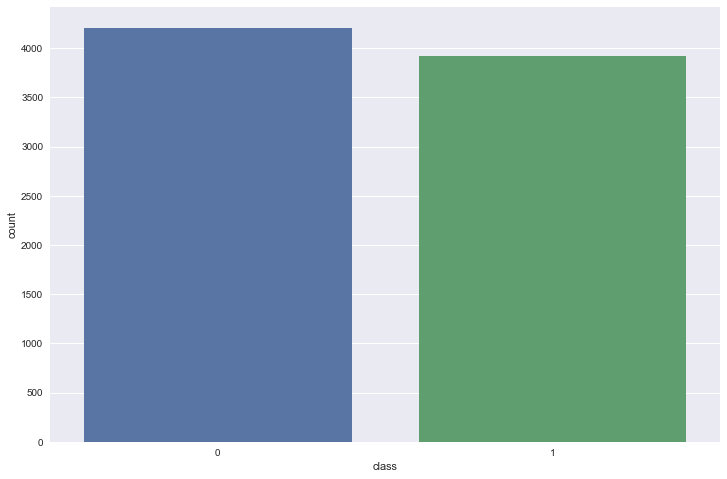

In [30]:
sns.countplot(mush['class'])

The target column seems to be balanced, the data has been cleaned and it is possible to move on to perform the algorithms

#### Creating a data partition

In [38]:
X = mush_encod[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']]
y = mush_encod['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [43]:
# Checking the train and test data
print(X_train.shape)
print(X_test.shape)
print('----------')
print(y_train.shape)
print(y_test.shape)

(5686, 21)
(2438, 21)
----------
(5686,)
(2438,)


### Logistic Regression

First, performing a logistic regression model wich would be compared with the Naive Bayes model

In [69]:
# Defining the model
log = LogisticRegression()

# Fitting the model
result_log = log.fit(X_train,y_train)

# Predicting the model
y_pred = result_log.predict(X_test)

In [70]:
# Comparing results values
pd.DataFrame(y_pred,y_test, columns=['predicted']).head()

,predicted
class,
0,0
0,0
0,0
1,1
0,0


#### Metrics

In [71]:
# Score
result_log.score(X_test,y_test)

0.9466776045939295

In [73]:
# Confusion matrix
log_conf = confusion_matrix(y_test, y_pred)
log_conf

array([[1212,   59],
       [  71, 1096]])

In [80]:
# ROC Cruve
y_pred_prob = result_log.predict_proba(X_test)

# fpr -> False Positive Rate
# tpr -> True Positive Rate

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1] )

In [82]:
# AUC score
log_acu = auc(fpr, tpr)
log_acu

0.9777799801383037

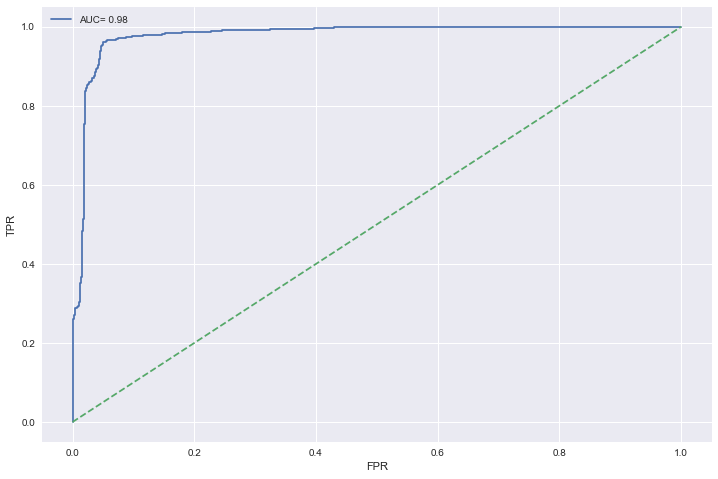

In [86]:
# Plotting ROC Curve
plt.figure(figsize=(12,8))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % log_acu )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

### Naive Bayes Classifier

In [91]:
# Defining the model
NB = GaussianNB()

# Fitting the model
result_NB = NB.fit(X_train,y_train)

# Predicting the model
y_pred_NB = result_NB.predict(X_test)

#### Metrics

In [92]:
# Score
result_NB.score(X_test,y_test)

0.9130434782608695

In [93]:
# Confusion matrix
NB_conf = confusion_matrix(y_test, y_pred_NB)
NB_conf

array([[1166,  105],
       [ 107, 1060]])

In [94]:
# ROC Cruve
y_pred_prob_NB = result_NB.predict_proba(X_test)

# fpr -> False Positive Rate
# tpr -> True Positive Rate

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test,y_pred_prob_NB[:,1] )

In [96]:
# AUC score
NB_acu = auc(fpr_NB, tpr_NB)
NB_acu

0.9411126999569193

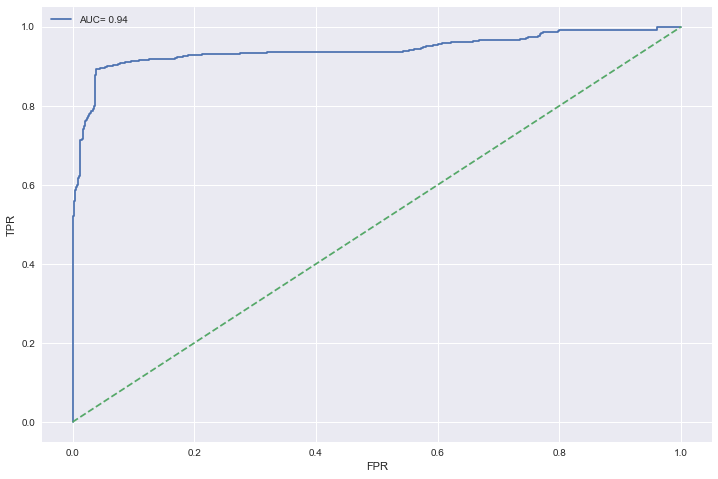

In [100]:
# Plotting ROC Curve
plt.figure(figsize=(12,8))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_NB, tpr_NB, label = 'AUC= %0.2f' % NB_acu)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

### Conclusion

Two different models have been implemented, the classical Logistic Regression model and Naive Bayes Classifier.
The result obtained for each model are very close one to each model but a better performance is obtained with Logistic Regression model. In this case, it should be used Logistic Regression with all variables. It should be studied the case of using the most significant variables (highest z-value) and which model fits better with them.

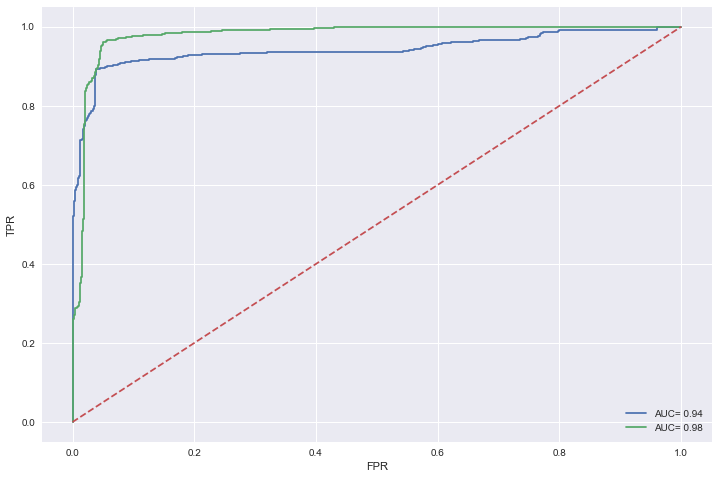

In [103]:
# Plotting both ROC Curve
plt.figure(figsize=(12,8))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_NB, tpr_NB, label = 'AUC= %0.2f' % NB_acu)
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % log_acu)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()